In [11]:
# https://www.youtube.com/watch?v=Te3YieMUYd8
# orjinal dosyada renkli çalışmaydı. Biz burada griye çevirdik
#https://github.com/bnsreenu/python_for_microscopists/blob/master/089a-auto_encode_single_image_to_different_image_V1.0.py


Burada domain adaptation yapılacak.
girdi olarak einstein resmi çıktı olarak mono lisa verilip eğitim yapılacak. Böylece bir resimden başka bir resim türetmek mümkün olabilmekte. Bir birine benzetilen yüz resimleri, optik miroskoptan elektron mikroskobu elde etme gibi uygulamalar mümkün olabilmektedir.

In [12]:
"""
@author: Sreenivas Bhattiprolu
PERSONAL NOTES:
Working great.
Good example to demo image reconstruction using autoencoders
Try different optimizers and loss functions to imrpove the result.
A machine with CUDA enabled GPU is recommended to speed up the training.
"""

'\n@author: Sreenivas Bhattiprolu\nPERSONAL NOTES:\nWorking great.\nGood example to demo image reconstruction using autoencoders\nTry different optimizers and loss functions to imrpove the result.\nA machine with CUDA enabled GPU is recommended to speed up the training.\n'

In [13]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential


In [15]:
SIZE=256  #Limiting to 256 size image as my laptop cannot handle larger images. 
img_data=[]

img=cv2.imread('einstein_original.jpg', 1)   #Change 1 to 0 for Grey scale images
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #Biz griye çevirdik. Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 1))
img_array = img_array.astype('float32') / 255.

In [16]:
img_data2=[]  #Second image to be provided as ground truth. 

img2=cv2.imread('monalisa_original_cropped.jpg', 1)   #Change 1 to 0 for Grey scale images
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) #Biz griye çevirdik  Changing BGR to RGB to show images in true colors
img2=cv2.resize(img2,(SIZE, SIZE))
img_data2.append(img_to_array(img2))

img_array2 = np.reshape(img_data2, (len(img_data2), SIZE, SIZE, 1)) #sondaki 1 gri, 3 olsa renkli
img_array2 = img_array2.astype('float32') / 255.

In [24]:
#Define Autoencoder model. 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 1))) #sondaki 1 gri, 3 olsa renkli
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same')) #1, (3,3) gri, 3,(3,3) renkli

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 8)       

In [26]:
model.fit(img_array, img_array2,
        epochs=500,                  #1000s of epochs needed for good results. Use GPU.
        shuffle=True)           #Shuffle data for each epoch

Epoch 1/500
1/1 [==============================] - 1s 793ms/step - loss: 0.1623 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 178ms/step - loss: 0.1477 - accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 182ms/step - loss: 0.1292 - accuracy: 0.0000e+00
Epoch 4/500
1/1 [==============================] - 0s 185ms/step - loss: 0.1085 - accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 178ms/step - loss: 0.0890 - accuracy: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 175ms/step - loss: 0.0789 - accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 174ms/step - loss: 0.0879 - accuracy: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 0s 187ms/step - loss: 0.0914 - accuracy: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 0s 170ms/step - loss: 0.0829 - accuracy: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 0s 178ms/step - loss:

Output


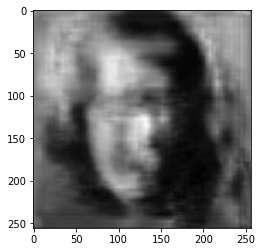

In [29]:
print("Output")
pred = model.predict(img_array)   #Predict model on the same input array.

#In reality, train on 1000s of input images and predict on images that the training 
#algorithm never saw. 

imshow(pred[0].reshape(SIZE,SIZE), cmap="gray")


#img2 = Image.fromarray(pred[0], 'RGB')
#img2.save("processed_img.jpg")